<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>Вывод:</strong></a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

**Признаки**
 - RowNumber — индекс строки в данных
 - CustomerId — уникальный идентификатор клиента
 - Surname — фамилия
 - CreditScore — кредитный рейтинг
 - Geography — страна проживания
 - Gender — пол
 - Age — возраст
 - Tenure — сколько лет человек является клиентом банка
 - Balance — баланс на счёте
 - NumOfProducts — количество продуктов банка, используемых клиентом
 - HasCrCard — наличие кредитной карты
 - IsActiveMember — активность клиента
 - EstimatedSalary — предполагаемая зарплата
    
**Целевой признак**
 - Exited — факт ухода клиента

## Подготовка данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #графики
from sklearn.model_selection import train_test_split #деление выборок
from sklearn.preprocessing import StandardScaler #масштабирование
from sklearn.linear_model import LogisticRegression # модель логистическая регрессия
from sklearn.tree import DecisionTreeClassifier #модель дерево решений
from sklearn.ensemble import RandomForestClassifier # модель случайный лес
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_curve,
                             roc_auc_score)
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE #увеличение выборки
from imblearn.under_sampling import RandomUnderSampler # уменьшение выборки
from sklearn.utils import shuffle #перемешивание данных
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

In [2]:
# чтение файла
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('churn.csv')
    
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Признаки:
 - RowNumber — индекс строки в данных
 - CustomerId — уникальный идентификатор клиента
 - Surname — фамилия
 - CreditScore — кредитный рейтинг
 - Geography — страна проживания
 - Gender — пол
 - Age — возраст
 - Tenure — сколько лет человек является клиентом банка
 - Balance — баланс на счёте
 - NumOfProducts — количество продуктов банка, используемых клиентом
 - HasCrCard — наличие кредитной карты
 - IsActiveMember — активность клиента
 - EstimatedSalary — предполагаемая зарплата
 
Целевой признак:
 - Exited — факт ухода клиента

In [3]:
#общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#замена названий, приведение к нижнему регистру
df.columns = df.columns.str.lower()
print(df.columns)

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')


In [5]:
#проверка пропусков
print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
print ('Количество пропусков: {:.0f}'.format(df.isnull().sum().sum()))
#доля пропусков в столбцах
print('Доля пропусков в столбцах:')
pd.DataFrame(round(df.isna().mean()*100)).sort_values(by = 0, ascending=False).style.background_gradient('coolwarm')


Проверка пропусков
Количество пропусков: 909
Доля пропусков в столбцах:


,0
tenure,9.000000
rownumber,0.000000
customerid,0.000000
surname,0.000000
creditscore,0.000000
geography,0.000000
gender,0.000000
age,0.000000
balance,0.000000
numofproducts,0.000000


In [6]:
#проверка на дубликаты
print(df.duplicated().sum())

0


In [7]:
#описание количественных данных
display(df.describe().round(2).T)

,count,mean,std,min,25%,50%,75%,max
rownumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
customerid,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
creditscore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,9091.0,5.00,2.89,0.00,2.00,5.00,7.00,10.00
balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
numofproducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
hascrcard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
isactivemember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimatedsalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


In [8]:
#описание категориальных данных
display(df.describe(include='object').T)

,count,unique,top,freq
surname,10000,2932,Smith,32
geography,10000,3,France,5014
gender,10000,2,Male,5457


In [9]:
#просмотр категориальных данных
print('\033[1m' + '\nВывод уникальных значений по каждому категориальному признаку:'+ '\033[0m')    
df_object = df.select_dtypes(include='object').columns
    
for i in df_object:
    print('\033[1m' + '_'+ str(i) + '\033[0m')
    display(df[i].value_counts())


Вывод уникальных значений по каждому категориальному признаку:
_surname


Smith          32
Scott          29
Martin         29
Walker         28
Brown          26
               ..
Wieck           1
O'Callaghan     1
Muravyov        1
Loginov         1
Morales         1
Name: surname, Length: 2932, dtype: int64

_geography


France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

_gender


Male      5457
Female    4543
Name: gender, dtype: int64

In [10]:
# удаление Surname, RowNumber, CustomerId (индекс строки, индификатор и фамилия)
#эти параметры не влияют на уход клиентов 
df.drop([ 'customerid', 'rownumber','surname',], axis=1, inplace=True)
#проверка
print(df.columns.to_list())

['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']


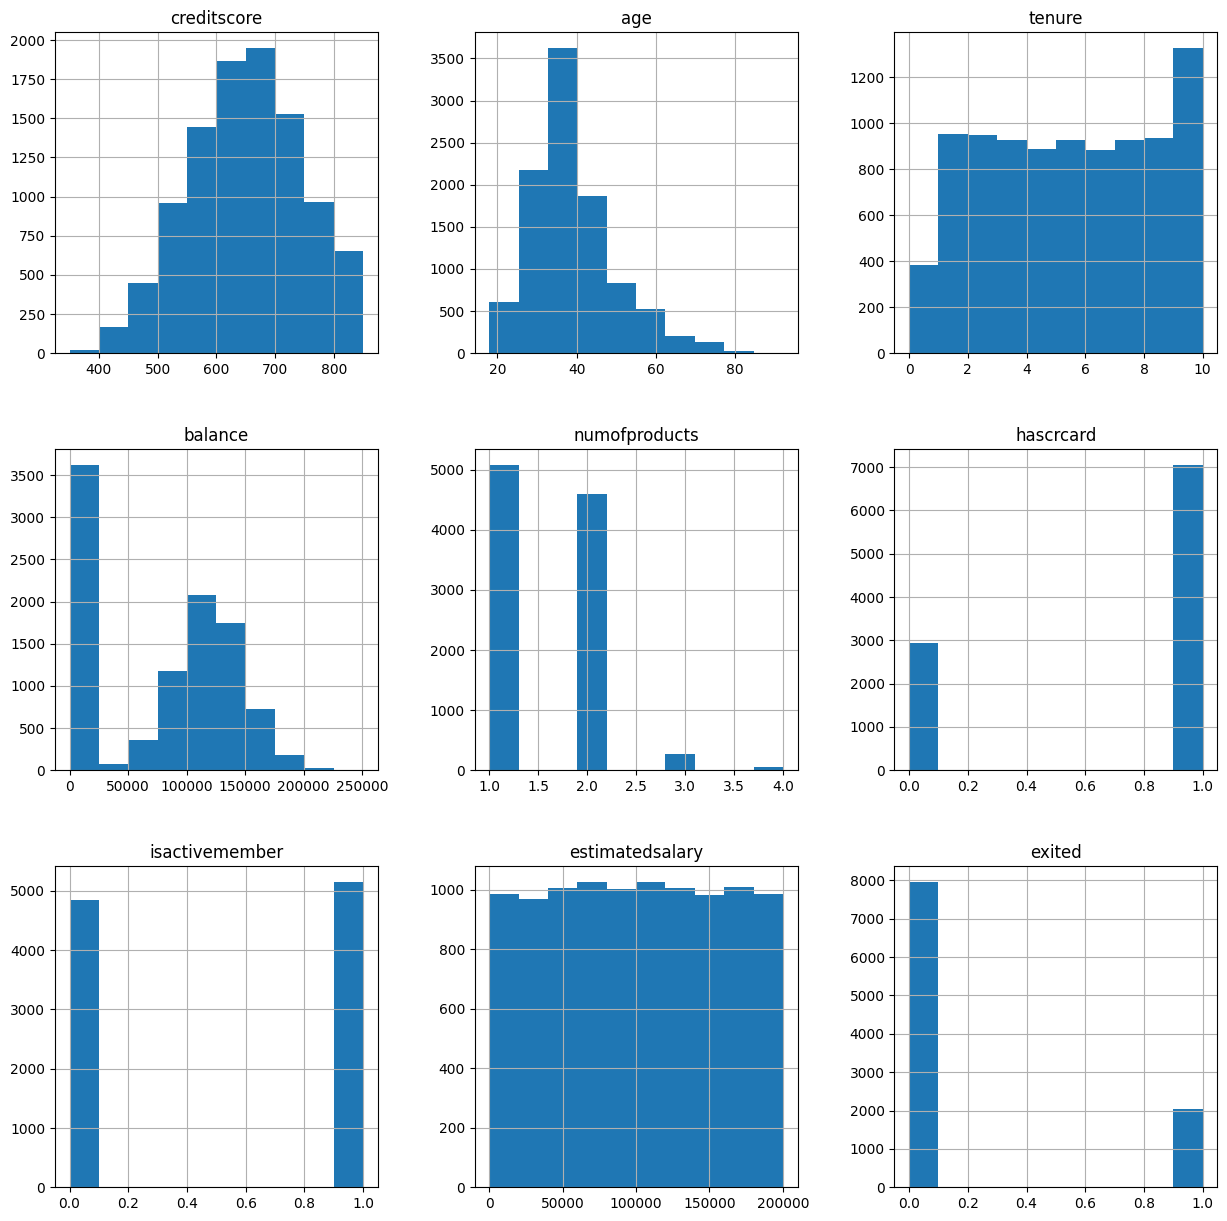

In [11]:
# графическое представление данных из таблиц
df.hist(figsize=(15, 15))
plt.show()

In [12]:
#просмотр даннных, где значение в столбце balance равно 0
display(df.query('balance == 0').head(15))

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1.0,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7.0,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3.0,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10.0,0.0,2,1,0,26260.98,0
13,549,France,Female,25,5.0,0.0,2,0,0,190857.79,0
14,635,Spain,Female,35,7.0,0.0,2,1,1,65951.65,0
17,549,Spain,Female,24,9.0,0.0,2,1,1,14406.41,0
18,587,Spain,Male,45,6.0,0.0,1,0,0,158684.81,0
19,726,France,Female,24,6.0,0.0,2,1,1,54724.03,0


**Вывод**
Если просматривать данные, все остальные строки заполнены в полном объеме. Данные оставим без изменений, учем в дальнейшем при анализе 

In [13]:
#просмотр данных по столбцу Tenure
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

**Вывод**
Распределение значений хаотичное, варьируется в диапазоне 800-950(на графике также это отображено), в связи с чем можно осуществить замену пустых значений на рандомные

In [14]:
#замена на рандомные значения
df.fillna(np.random.randint(min(df.tenure),max(df.tenure)), inplace=True)
#проверка
df['tenure'].isna().sum()

0

0    0.7963
1    0.2037
Name: exited, dtype: float64

<AxesSubplot:title={'center':'Доля классов в целевом признаке'}, xlabel='Значение признака', ylabel='Доля,%'>

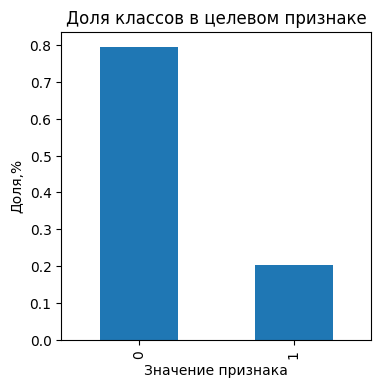

In [15]:
#доля отрицательных и положительных классов в целевом признаке (exited)
display(df['exited'].value_counts(normalize=1))
df['exited'].value_counts(normalize=1).plot(kind='bar', figsize = (4,4),
                                            title = 'Доля классов в целевом признаке',
                                            xlabel = 'Значение признака',
                                           ylabel = 'Доля,%')

**Вывод:**
-  все названия переведены в нижний регистр
- удалены  Surname, RowNumber, CustomerId (индекс строки, индификатор и фамилия)-эти параметры не влияют на уход клиентов 
- пустые значения в столбце Ternure(сколько лет человек является клиентом банка) заменены на рандомные (от 0 до 10)
- два столбца с категориальными признаками: geography(страна проживания),gender(пол)
- дубликатов нет
- объектов отрицательного класса больше в столце exited(факт ухода клиента),соотношение 4 к 1( 80% со значением "0", 20% -"1")


## Исследование задачи

План действий:

1. Разделить данные на признаки и целевой признак(features, target)
2. Разделить на выборки: обучающую (60%), валидационную(20%) ,тестовую(20%)
3. Провести прямое кодирование( изменение категориальных признаков в числовые)
4. Масштабировать признаки
5. Исследование моделей:
    - дерево решений
    - случайный лес
    - логистиеская регрессия

In [17]:
#выделение признаков и целевого признака у отдельные таблицы
features = df.drop(['exited'],axis=1)
target = df['exited']
print(features.shape)
print(target.shape)

(10000, 10)
(10000,)


In [18]:
#деление на две выборки: обучающую (60%) и валидационную(предварительную 40%)
features_train, features_val, target_train, target_val = train_test_split(features, target,
                                                                              test_size=0.4, 
                                                                              random_state=12345)
#разбивка предварительной на : валидационую(20%) и тестовую(20%)
features_valid, features_test, target_valid, target_test = train_test_split(features_val, target_val,
                                                                              test_size=0.5, 
                                                                              random_state=12345)

#проверка
print(features_train.shape)
print(features_valid.shape)
print(target_train.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 10)
(2000, 10)
(6000,)
(2000,)
(2000, 10)
(2000,)


In [19]:
display(features_train.head(5))

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
7479,567,Spain,Male,35,8.0,153137.74,1,1,0,88659.07
3411,711,France,Female,37,8.0,113899.92,1,0,0,80215.20
6027,850,Germany,Male,44,3.0,140393.65,2,0,1,186285.52
1247,512,France,Male,24,6.0,0.00,2,1,0,37654.31
3716,665,Germany,Female,27,2.0,147435.96,1,0,0,187508.06


In [20]:
#категориальные признаки для OHE 
ohe_features = ['geography', 'gender']

In [21]:
# изменение категориальных признаков в числовые, с исползованием техники OHE
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore',sparse=False)
#обучение на тестовой выборке на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(features_train[ohe_features]) 

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [22]:
# добавляем закодированные признаки в features_train
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[ohe_features])

# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(ohe_features, axis=1)
#проверка результата
features_train.head()


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
7479,567,35,8.0,153137.74,1,1,0,88659.07,0.0,1.0,1.0
3411,711,37,8.0,113899.92,1,0,0,80215.20,0.0,0.0,0.0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1.0,0.0,1.0
1247,512,24,6.0,0.00,2,1,0,37654.31,0.0,0.0,1.0
3716,665,27,2.0,147435.96,1,0,0,187508.06,1.0,0.0,0.0


In [23]:
#применение на валидацонной и тестовой выборках
features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[ohe_features])
features_valid = features_valid.drop(ohe_features, axis=1)
features_test[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_test[ohe_features])
features_test = features_test.drop(ohe_features, axis=1)

#проверка результата
display(features_valid.head())
display(features_test.head())

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
8532,585,35,2.0,0.00,2,1,0,98621.04,0.0,0.0,0.0
5799,625,45,3.0,0.00,1,1,1,184474.15,0.0,0.0,0.0
5511,667,32,0.0,103846.65,1,1,0,20560.69,1.0,0.0,1.0
7365,568,36,10.0,153610.61,1,1,1,54083.80,0.0,1.0,0.0
7367,606,42,10.0,0.00,2,1,0,177938.52,0.0,1.0,1.0


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
7041,438,38,2.0,0.00,2,1,0,136859.55,0.0,0.0,1.0
5709,644,39,9.0,0.00,1,1,0,3740.93,0.0,0.0,0.0
7117,564,31,5.0,121461.87,1,1,1,20432.09,0.0,1.0,1.0
7775,628,40,10.0,0.00,2,1,0,103832.58,0.0,1.0,1.0
8735,728,30,10.0,114835.43,1,0,1,37662.49,0.0,0.0,1.0


In [24]:
#масштабирование данных
#числовые признаки numeric(за вычетом столбцов hascrcard, isactivemember, которые содержат только значения 0; 1)
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment=None
#проверка
display(features_train.head(3))
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,0.874724,1.232271,-0.891560,1,0,-0.187705,0.0,1.0,1.0
3411,0.608663,-0.183385,0.874724,0.600563,-0.891560,0,0,-0.333945,0.0,0.0,0.0
6027,2.052152,0.480939,-0.804423,1.027098,0.830152,0,1,1.503095,1.0,0.0,1.0


(6000, 11)
(2000, 11)
(2000, 11)


**Дерево решений**

In [25]:
#исследование модели "решающего дерева" 
best_model = None
best_result = 0
best_result_f1 = 0
best_max_depth = 0
best_min_sample_leaf = 0
for depth in range(1,15):
    for i in range(1, 10):
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth, max_features = i)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions_valid)
        result_f1 = f1_score(target_valid, predictions_valid)
        if result_f1 > best_result_f1:
            best_model = model
            best_result = result
            best_result_f1 = result_f1
            best_max_depth = depth
            best_min_sample_leaf = i
print('F1 лучшей модели:',best_result_f1)
print('Accuracy лучшей модели:',best_result)
print("Глубина дерева лучшей модели:", best_max_depth)
print("Лучшая модель:",best_model)

F1 лучшей модели: 0.5904486251808971
Accuracy лучшей модели: 0.8585
Глубина дерева лучшей модели: 6
Лучшая модель: DecisionTreeClassifier(max_depth=6, max_features=5, random_state=12345)


**Случайный лес**

In [26]:
#исследование модели "случайный лес"

best_model = None
best_result = 0
best_result_f1 = 0
best_est = 0
best_depth = 0
for est in range(1,101,10):
    for depth in range (1,15):
        model = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result_f1 = f1_score(target_valid, predictions_valid)
        result = accuracy_score(target_valid, predictions_valid)
        if result_f1 > best_result_f1:
            best_model = model
            best_result = result
            best_result_f1 = result_f1
            best_est = est
            best_depth = depth

print('F1 лучшей модели:',best_result_f1)
print('Accuracy лучшей модели:',best_result)
print('Количество деревьев лучшей модели:', best_est )
print ('Глубина дерева лучшей модели:', best_depth )
print('Лучшая модель:', best_model)

F1 лучшей модели: 0.5885885885885885
Accuracy лучшей модели: 0.863
Количество деревьев лучшей модели: 31
Глубина дерева лучшей модели: 12
Лучшая модель: RandomForestClassifier(max_depth=12, n_estimators=31, random_state=12345)


**Логистическая регрессия**

In [27]:
#изучение модели логистической регрессии
best_model = None
best_result_f1 = 0
best_result = 0
best_C = 0

for i in range(1,5,1):
    model = LogisticRegression(random_state =12345, solver ='lbfgs', max_iter=30, C=i)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    if result_f1 > best_result_f1:
            best_model = model
            best_result = result
            best_result_f1 = result_f1
            best_C = i
            
print('F1 модели логической регресии:', result_f1)
print('Accuracy лучшей модели:',best_result)
print('max_C:', best_C)
print('Лучшая модель:', best_model)

F1 модели логической регресии: 0.33389544688026984
Accuracy лучшей модели: 0.8035
max_C: 1
Лучшая модель: LogisticRegression(C=1, max_iter=30, random_state=12345)


### **Вывод:**

На данном этапе лучшие результаты на валидационной выборке показала модель "Случайный лес" со значением accuracy = 0.86, F1 = 0.579

Результаты моделей следующие:
 - Дерево решений: аccuracy = 0.859, F1 = 0.593 (гиперпараметры: max_depth=6, max_features=5)
 - Случайный лес: аccuracy = 0.865, F1 = 0.589 (гиперпараметры: max_depth=11, n_estimators=81)
 - Логистическая регрессия: аccuracy = 0.802, F1 = 0.3338 (гиперпараметры: max_iter=30,C=3)

## Борьба с дисбалансом

План действий:

Изучение моделей
1. Upsampling (увеличение выборки) 
2. Downsampling (уменьшение выборки)
2. Взвешивание классов (class_weight='balanced')

**Upsampling**

In [30]:
#увеличение обучающей выборки (метод SMOTE)
oversample = SMOTE(random_state=12345)
features_train_up, target_train_up = oversample.fit_resample(features_train, target_train)
#проверка
print(features_train_up.shape)
print(target_train_up.shape)

(9608, 11)
(9608,)


In [31]:
#исследование модели "решающего дерева" на увелич выборке
best_model_dt_up = None
best_result = 0
best_result_f1 = 0
best_max_depth = 0
best_min_sample_leaf = 0
for depth in range(1,15):
    for i in range(1, 10):
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth, max_features = i)
        model.fit(features_train_up, target_train_up)
        predictions_valid = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions_valid)
        result_f1 = f1_score(target_valid, predictions_valid)
        if result_f1 > best_result_f1:
            best_model_rf_up = model
            best_result = result
            best_result_f1 = result_f1
            best_max_depth = depth
            best_min_sample_leaf = i
print('F1 лучшей модели:',best_result_f1)
print('Accuracy лучшей модели:',best_result)
print("Глубина дерева лучшей модели:", best_max_depth)
print("Лучшая модель:",best_model_rf_up)

F1 лучшей модели: 0.5931558935361216
Accuracy лучшей модели: 0.8395
Глубина дерева лучшей модели: 5
Лучшая модель: DecisionTreeClassifier(max_depth=5, max_features=9, random_state=12345)


In [32]:
#исследование модели "случайный лес" на новой (увеличенной выборке)

best_model_rf_up = None
best_result = 0
best_result_f1 = 0
best_est = 0
best_depth = 0
for est in range(1,101,10):
    for depth in range (1,11):
        model = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth = depth)
        model.fit(features_train_up, target_train_up)
        predictions_valid = model.predict(features_valid)
        result_f1 = f1_score(target_valid, predictions_valid)
        result = accuracy_score(target_valid, predictions_valid)
        if result_f1 > best_result_f1:
            best_model_rf_up = model
            best_result = result
            best_result_f1 = result_f1
            best_est = est
            best_depth = depth

print('F1 лучшей модели:',best_result_f1)
print('Accuracy лучшей модели:',best_result)
print('Количество деревьев лучшей модели:', best_est )
print ('Глубина дерева лучшей модели:', best_depth )
print('Лучшая модель:', best_model_rf_up)

F1 лучшей модели: 0.6130884041331801
Accuracy лучшей модели: 0.8315
Количество деревьев лучшей модели: 21
Глубина дерева лучшей модели: 10
Лучшая модель: RandomForestClassifier(max_depth=10, n_estimators=21, random_state=12345)


**Вывод:**

Upsampling улучшил результаты модели "случайный лес".
 - Дерево решений: аccuracy = 0.795, F1 = 0.5872 при max_depth=6, max_features=9 (было:аcc = 0.858, F1 = 0.593 , max_depth=6, max_features=5)
 - Случайный лес: аccuracy = 0.823, F1 = 0.6232 при max_depth=7, n_estimators=11 (было: асс = 0.861, F1 = 0.587, max_depth=11, n_estimators=9)

**Downsampling**

In [34]:
#уменьшение обучающей выборки (метод RandomUnderSampler)
undersample = RandomUnderSampler(random_state=12345)
features_train_down, target_train_down = undersample.fit_resample(features_train, target_train)
#проверка
print(features_train_down.shape)
print(target_train_down.shape)

(2392, 11)
(2392,)


In [35]:
#исследование модели "решающего дерева" на уменьшенной выборке
best_model_dt_down = None
best_result = 0
best_result_f1 = 0
best_max_depth = 0
best_min_sample_leaf = 0
for depth in range(1,15):
    for i in range(1, 10):
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth, max_features = i)
        model.fit(features_train_down, target_train_down)
        predictions_valid = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions_valid)
        result_f1 = f1_score(target_valid, predictions_valid)
        if result_f1 > best_result_f1:
            best_model_dt_down = model
            best_result = result
            best_result_f1 = result_f1
            best_max_depth = depth
            best_min_sample_leaf = i
print('F1 лучшей модели:',best_result_f1)
print('Accuracy лучшей модели:',best_result)
print("Глубина дерева лучшей модели:", best_max_depth)
print("Лучшая модель:",best_model_dt_down)
print(classification_report(target_valid, predictions_valid))

F1 лучшей модели: 0.5747800586510263
Accuracy лучшей модели: 0.7825
Глубина дерева лучшей модели: 6
Лучшая модель: DecisionTreeClassifier(max_depth=6, max_features=8, random_state=12345)
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1582
           1       0.38      0.71      0.50       418

    accuracy                           0.70      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.70      0.72      2000



In [36]:
#исследование модели "случайный лес" на новой (уменьшенной выборке)

best_model_rf_down = None
best_result = 0
best_result_f1 = 0
best_est = 0
best_depth = 0
for est in range(1,101,10):
    for depth in range (1,11):
        model = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth = depth)
        model.fit(features_train_down, target_train_down)
        predictions_valid = model.predict(features_valid)
        result_f1 = f1_score(target_valid, predictions_valid)
        result = accuracy_score(target_valid, predictions_valid)
        if result_f1 > best_result_f1:
            best_model_rf_down = model
            best_result = result
            best_result_f1 = result_f1
            best_est = est
            best_depth = depth

print('F1 лучшей модели:',best_result_f1)
print('Accuracy лучшей модели:',best_result)
print('Количество деревьев лучшей модели:', best_est )
print ('Глубина дерева лучшей модели:', best_depth )
print('Лучшая модель:', best_model_rf_down)

F1 лучшей модели: 0.5998107852412488
Accuracy лучшей модели: 0.7885
Количество деревьев лучшей модели: 91
Глубина дерева лучшей модели: 7
Лучшая модель: RandomForestClassifier(max_depth=7, n_estimators=91, random_state=12345)


**Вывод:**

Самый лучший результат показала модель "случайный лес" с учетом дисбаланса(upsampling)(гиперпараметры max_depth=7, n_estimators=11)

Для сравнения следующие результаты F1(соотношение полноты и точности) показывают модели:

 - Дерево решений: train F1=0.590, upsampling F1=0.5872, downsampling F1=0.5747
 - Случайный лес: train F1=0.587, upsampling F1=0.6232, downsampling F1=0.5969

**Взвешивание классов**

In [37]:
#изучение модели логистической регрессии (с учетом дисбаланса )
best_model = None
best_result_f1 = 0
best_result = 0
best_iter = 0

for iter in range(100,1100,100):
    model = LogisticRegression(random_state =12345, solver ='lbfgs', max_iter=iter, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    result_f1 = f1_score(target_valid, predictions_valid)
    if result_f1 > best_result_f1:
            best_model = model
            best_result = result
            best_result_f1 = result_f1
            best_iter = iter
            
print('F1 модели логической регресии:', result_f1)
print('Accuracy лучшей модели:',best_result)
print('max_iter:', best_iter)
print('Лучшая модель:', best_model)

F1 модели логической регресии: 0.4888888888888888
Accuracy лучшей модели: 0.701
max_iter: 100
Лучшая модель: LogisticRegression(class_weight='balanced', random_state=12345)


In [38]:
#измерение порога
model = LogisticRegression(random_state =12345, solver ='lbfgs')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

for threshold in np.arange(0,0.3,0.05):
    predicted_valid = model.predict(features_valid)
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | F1 = {:.3f},".format(threshold, f1))

Порог = 0.00 | F1 = 0.346,
Порог = 0.05 | F1 = 0.378,
Порог = 0.10 | F1 = 0.423,
Порог = 0.15 | F1 = 0.463,
Порог = 0.20 | F1 = 0.479,
Порог = 0.25 | F1 = 0.498,


**Вывод:**
С добавлением параметра class_weight='balanced' ситуация улучшилась. Значение F1 = 0.488 (без учета дисбаланса F1 = 0.334).

In [39]:
#построение ROC кривой и расчет AOC-ROC
def roc(model): 
    probabilities_valid = model.predict_proba(features_valid) #значение вероятностей
    probabilities_one_valid = probabilities_valid[:, 1] #вероятности со значением 1
    
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.figure(figsize=(4,4))
    plt.plot(fpr, tpr) #построение графика 
    plt.plot([0,1],[0,1],linestyle = '--') #ROC-кривая случайной модели
    plt.xlim([0.0, 1.0]) #установка грани осей от 0 до 1
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show() 
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print("AUC_ROC:", auc_roc)
    return auc_roc

Так как наилучшие показатели показали модель случайный лес, построим графики ROC кривой для upsampling  и downsampling

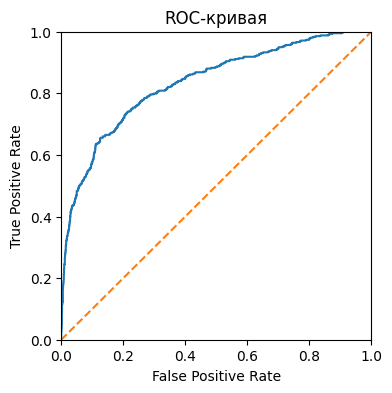

AUC_ROC: 0.8339702333065164


0.8339702333065164

In [40]:
#ROC кривая для модели случайный лес сформированной по увеличенной выборке (с использованием техники upnsampling)
roc(best_model_rf_up)

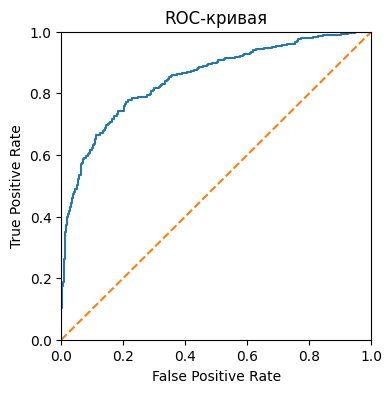

AUC_ROC: 0.8495484487566464


0.8495484487566464

In [41]:
#ROC кривая для модели случайный лес сформированной по уменьшенной выборке (с испльзованием техники downsampling)
roc(best_model_rf_down)

In [42]:
# проверка на декватность( на констатной модели, все значения 1)
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
print('F1:', f1_score(dummy_model.predict(features_test), target_test))


F1: 0.3491539413949649


**Вывод:**
Значения AUC-ROC  близки к друг другу
AUC-ROC модели случайного леса(upsamling) = 0,845
AUC-ROC модели случайного леса(downsamling) = 0,848

Для борьбы с дисбалансом использовали upsampling и downsampling.
Модель "случайный лес" с учетом дисбаланса(upsampling) показала результат F1=0.6232(гиперпараметры max_depth=7, n_estimators=11),
 при downsampling F1=0.587(гиперпараметры max_depth=7, n_estimators=91)

В данном случае, лучше остановиться на модели Случайный лес и использованием upsampling, так как результат F1 выше, и при downsampling  используется урезанная выборка, что  также сказывается на результатах модели
F1 на констатной модели составляет F1=0.349 , те среднегармоническое приближается к 0

## Тестирование модели

In [43]:
#Расчет accuracy и F1 на тестовой выборке по лучшей модели (техника upsampling)
predictions = best_model_rf_up.predict(features_test)
print(best_model_rf_up)
print("Accuracy:", accuracy_score(target_test, predictions))
print("F1:", f1_score(predictions, target_test))

RandomForestClassifier(max_depth=10, n_estimators=21, random_state=12345)
Accuracy: 0.8165
F1: 0.5881032547699214


In [44]:
#Расчет accuracy и F1 на тестовой выборке по лучшей модели (техника downsampling)
predictions = best_model_rf_down.predict(features_test)
print(best_model_rf_down)
print("Accuracy:", accuracy_score(target_test, predictions))
print("F1:", f1_score(predictions, target_test))

RandomForestClassifier(max_depth=7, n_estimators=91, random_state=12345)
Accuracy: 0.7745
F1: 0.5843317972350232


## Общий вывод:


1. Был произведен первичныый анализ данных, в ходе которго:
 - все названия переведены в нижний регистр
 - удалены Surname, RowNumber, CustomerId (индекс строки, индификатор и фамилия)-эти параметры не влияют на уход клиентов
 - пустые значения в столбце Ternure(сколько лет человек является клиентом банка) заменены на рандомные (от 0 до 10)
- выявлен дисбаланс классов: объектов отрицательного класса больше в столце exited (факт ухода клиента),соотношение 4 к 1( 80% со значением "0", 20% -"1")

2. Произведена преобработка данных:
- изменение категориальных признаков на числовые(One_hot_encoding)
- деление выборок на обучающую (60%), валидационную(20%) ,тестовую(20%)
- маштабирование признаков(StandardScaler)

3. Исследованы модели: дерево решений, случайный лес, логистическая регрессия.

Модель случайного леса до борьбы с дисбалансом показывала результат метрики f1 - 0.585(гиперпараметры: max_depth=11, n_estimators=9), дерево решений - 0.593 (max_depth=6, max_features=5), логистическая регрессия - 0.334(max_iter=100)

4. Произведен upsampling положительного класса(уменьшение выборки), благодаря чему удалось повысить f1 меру до 0.624. Dowmsampling(уменьшение выборки) до 0.67.
AUC-ROC upsampling составила 0.853, AUC-ROC downsampling составила 0.845,чем выше показатель, тем качественее классификатор

5. Проверка на тестовой выборке подтвердила, что upsampling помог справиться с дисбалансом классов и удалось увеличить метрику f1 до 60,22%




